In [1]:
from ozclim import tools
import xarray as xr 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from scipy import stats 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ref = tools.get_ensemble_ds("ref", "MDA8_O3")*1e9 # ppbv
refSNOx = tools.get_ensemble_ds("refSNOx", "MDA8_O3")*1e9 # ppbv

refshort = tools.get_ensemble_ds("refshort", "MDA8_O3")*1e9 # ppbv
refSNOxshort = tools.get_ensemble_ds("refSNOxshort", "MDA8_O3")*1e9 # ppbv

polshort = tools.get_ensemble_ds("pol3.7short", "MDA8_O3")*1e9 # ppbv
polSNOxshort = tools.get_ensemble_ds("pol3.7SNOxshort", "MDA8_O3")*1e9 # ppbv

['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Documents/OZCLIM_local/data/GCHP_CAM_c48_20240312/GCHP.w28_refSNOx_c48.MDA8_O3.nc4']
['/Users/emmie/Docum

In [3]:
present_ratio = refSNOx/ref
future_ratio = refSNOxshort/refshort
futurepol_ratio = polSNOxshort/polshort

In [4]:
present_ratio_noland = tools.mask_ocean_c48(present_ratio)
future_ratio_noland = tools.mask_ocean_c48(future_ratio)
futurepol_ratio_noland = tools.mask_ocean_c48(futurepol_ratio)

In [5]:
months = [6,7,8]

In [6]:
present_ratio_noland = present_ratio_noland.sel(time=present_ratio_noland.time.dt.month.isin(months))
future_ratio_noland = future_ratio_noland.sel(time=future_ratio_noland.time.dt.month.isin(months))
futurepol_ratio_noland = futurepol_ratio_noland.sel(time=futurepol_ratio_noland.time.dt.month.isin(months))


In [7]:
# Eastern North America
region_num = 5

present_ratio_noland_region = tools.crop_regionmask_ar6_c48(present_ratio_noland, region_num)
future_ratio_noland_region = tools.crop_regionmask_ar6_c48(future_ratio_noland, region_num)  
futurepol_ratio_noland_region = tools.crop_regionmask_ar6_c48(futurepol_ratio_noland, region_num)

present = present_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
future = future_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
futurepol = futurepol_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)

present_NDD_annual = present.where(present > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])
future_NDD_annual = future.where(future > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])
futurepol_NDD_annual = futurepol.where(futurepol > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])

p = present_NDD_annual.values.flatten()
f = future_NDD_annual.values.flatten()
fp = futurepol_NDD_annual.values.flatten()

p = p[~np.isnan(p)]
f = f[~np.isnan(f)]
fp = fp[~np.isnan(fp)]

In [8]:
# West Central Europe
region_num = 17

present_ratio_noland_region = tools.crop_regionmask_ar6_c48(present_ratio_noland, region_num)
future_ratio_noland_region = tools.crop_regionmask_ar6_c48(future_ratio_noland, region_num)  
futurepol_ratio_noland_region = tools.crop_regionmask_ar6_c48(futurepol_ratio_noland, region_num)

present = present_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
future = future_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
futurepol = futurepol_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)

present_NDD_annual = present.where(present > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])
future_NDD_annual = future.where(future > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])
futurepol_NDD_annual = futurepol.where(futurepol > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])

p2 = present_NDD_annual.values.flatten()
f2 = future_NDD_annual.values.flatten()
fp2 = futurepol_NDD_annual.values.flatten()

p2 = p2[~np.isnan(p2)]
f2 = f2[~np.isnan(f2)]
fp2 = fp2[~np.isnan(fp2)]

In [9]:
# East Asia
region_num = 35

present_ratio_noland_region = tools.crop_regionmask_ar6_c48(present_ratio_noland, region_num)
future_ratio_noland_region = tools.crop_regionmask_ar6_c48(future_ratio_noland, region_num)  
futurepol_ratio_noland_region = tools.crop_regionmask_ar6_c48(futurepol_ratio_noland, region_num)

present = present_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
future = future_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)
futurepol = futurepol_ratio_noland_region['SpeciesConc_O3'].isel(lev=0, region=0, drop=True)

present_NDD_annual = present.where(present > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])
future_NDD_annual = future.where(future > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])
futurepol_NDD_annual = futurepol.where(futurepol > 1).resample(time="QS-DEC").count(dim=['time','Ydim','Xdim', 'nf'])

p3 = present_NDD_annual.values.flatten()
f3 = future_NDD_annual.values.flatten()
fp3 = futurepol_NDD_annual.values.flatten()

p3 = p3[~np.isnan(p3)]
f3 = f3[~np.isnan(f3)]
fp3 = fp3[~np.isnan(fp3)]

0.0 33.0
PRESENT REF
ENA Present:
8
4
FUTURE REF
ENA Future:
11
5
PRESENT REF
WCE: Present
87
35
FUTURE REF
WCE: Future
94
31
PRESENT REF
EAS: Present
2836
343
FUTURE REF
EAS: Future
2314
360
0.0 33.0
PRESENT REF
FUTURE REF
ENA Future Pol
8
7
PRESENT REF
FUTURE REF
WCE Future Pol
85
29
PRESENT REF
FUTURE REF
EAS Future Pol
2421
297


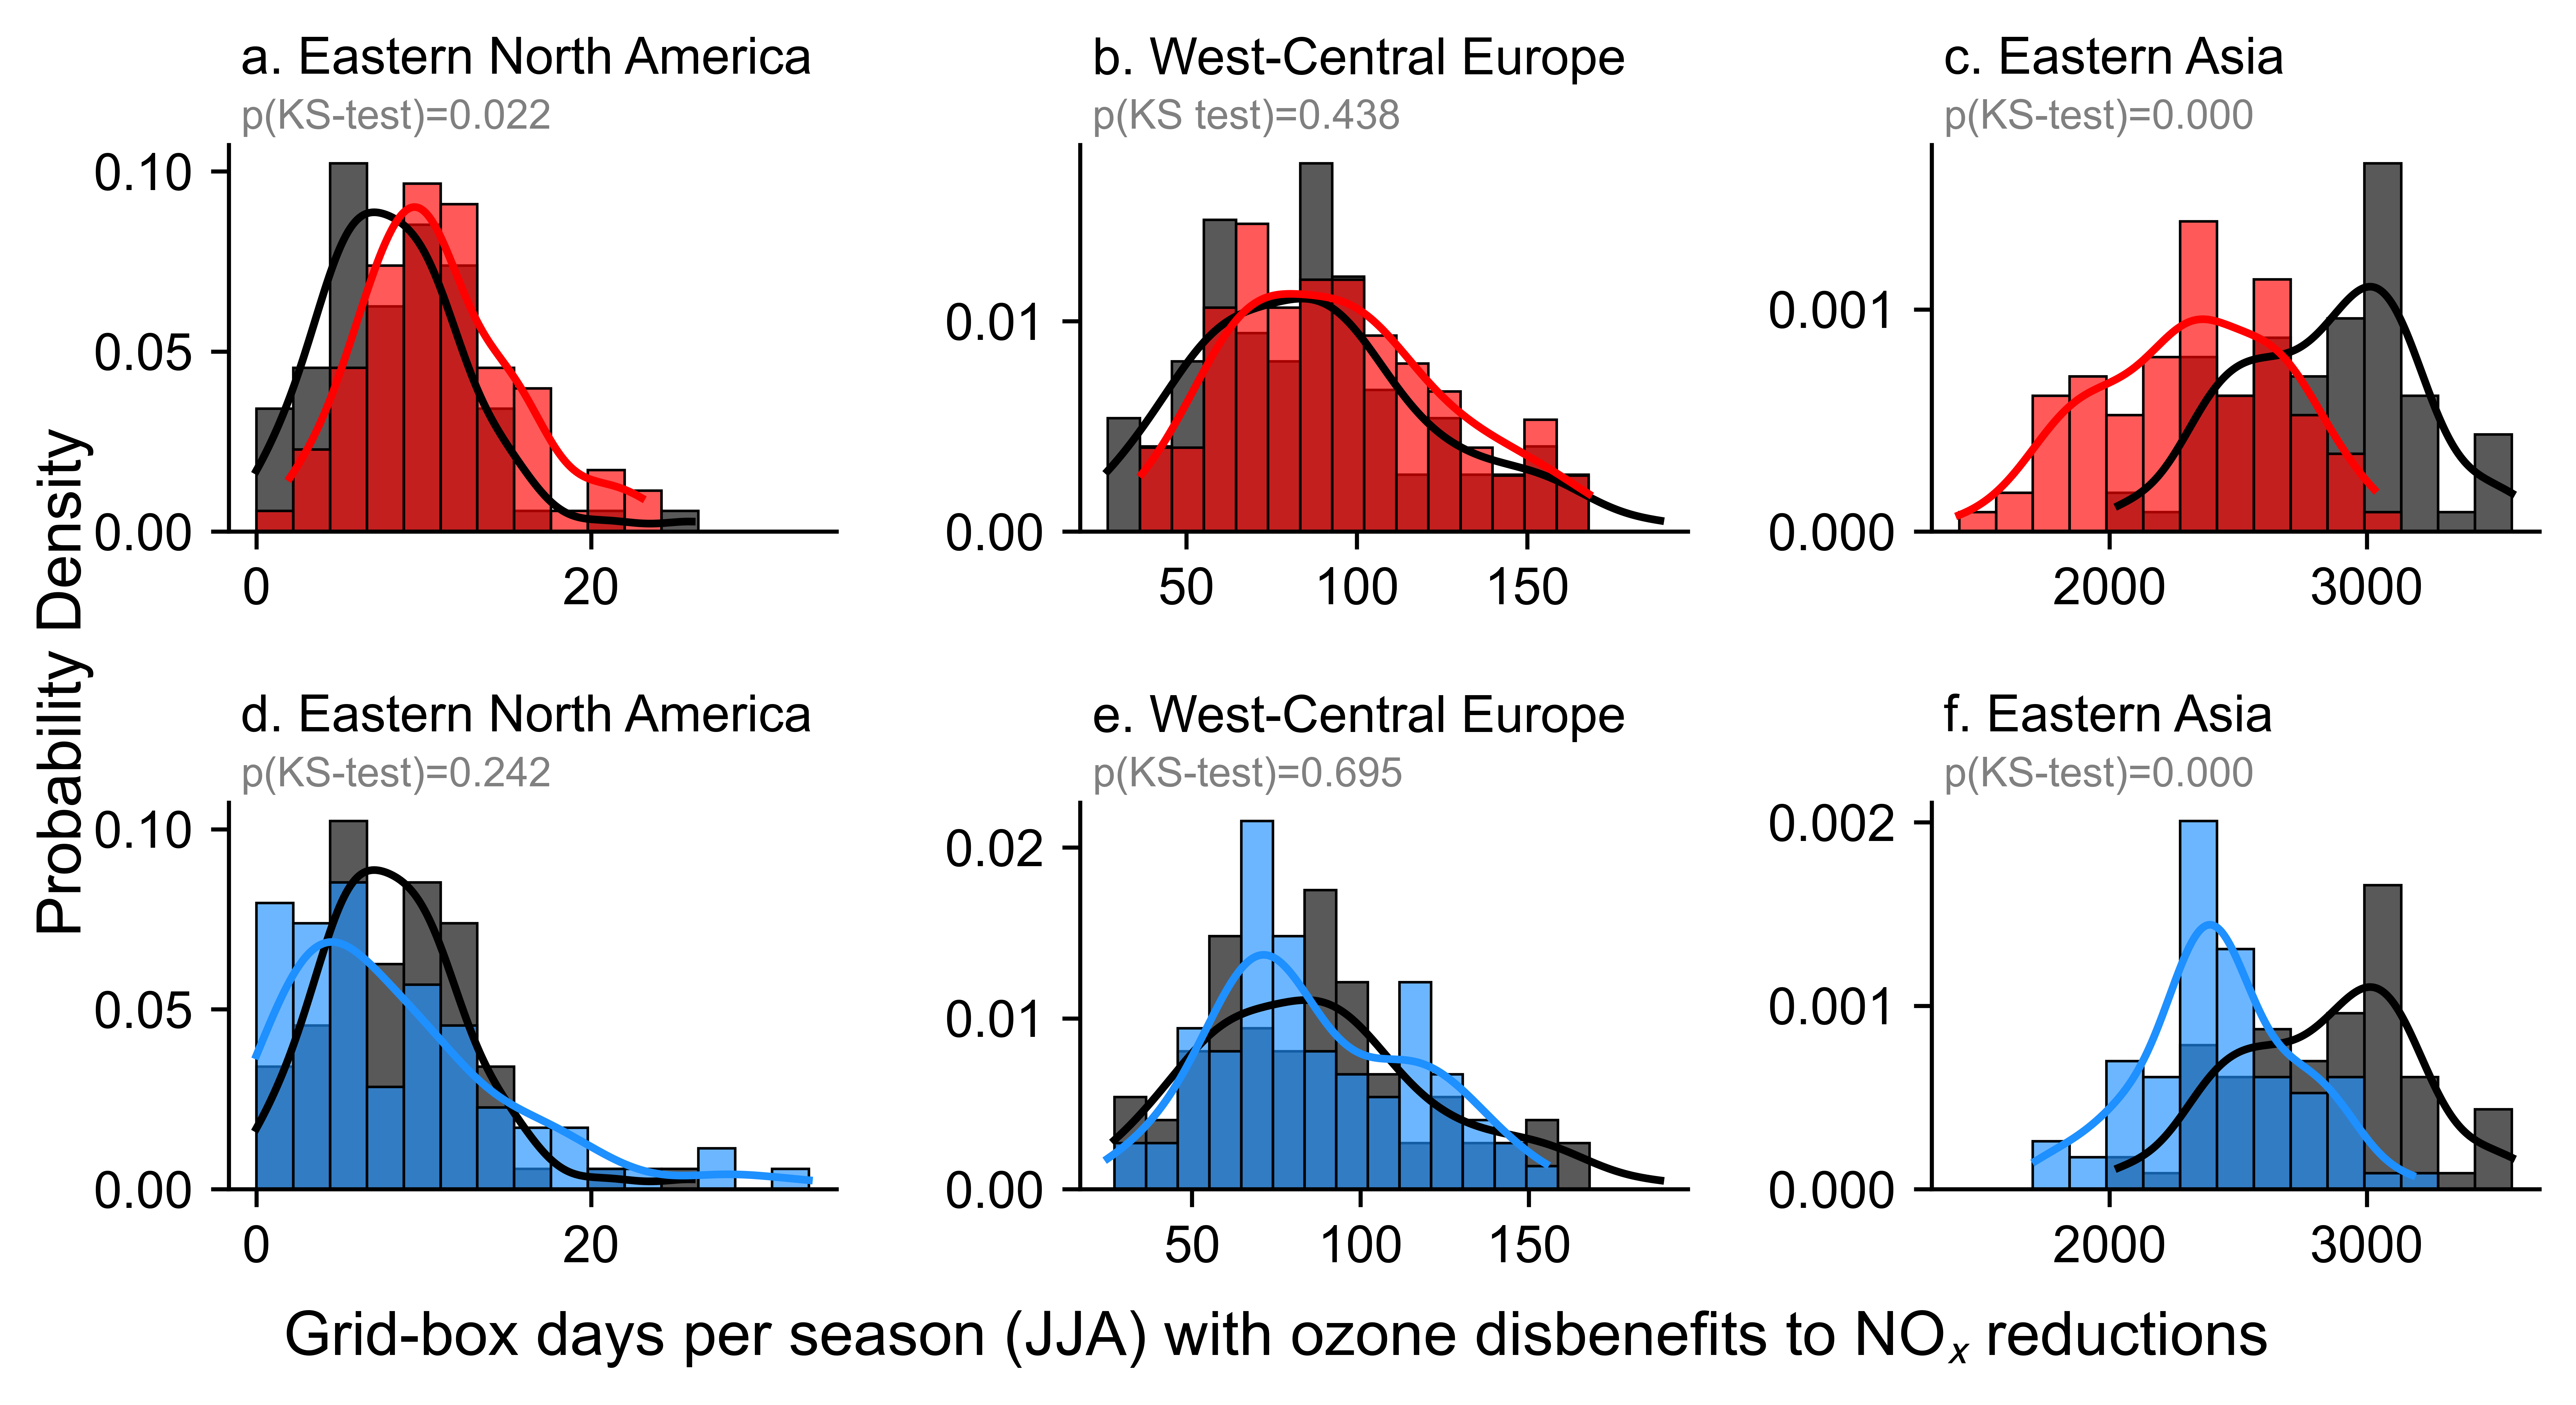

In [10]:
tools.set_matplotlib_font("Arial")
fig, ax = plt.subplots(
    figsize=(7, 3.8), 
    dpi=1200, 
    sharex=False, sharey=False,
    nrows=2, ncols=3,
    constrained_layout=True,
)
ax = ax.flatten()
titles= ["a. Eastern North America", "b. West-Central Europe", "c. Eastern Asia",
         "d. Eastern North America", "e. West-Central Europe", "f. Eastern Asia"]
ar6_region = {
        "ENA": 5,
        "EAS": 35,
        "WCE": 17,
    }

num_bins=15

# Index 0 = ENA p and f
min_val = np.concatenate([p]).min()
max_val = np.concatenate([fp]).max()
print(min_val,max_val)

hist1 = sns.histplot(p, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[0], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(f, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[0], kde=True, color='red',
                                line_kws={'color': 'r'}, edgecolor="k", linewidth=0.5, alpha=0.65)

print("PRESENT REF")
formatted_pmean = format(np.mean(p), ".0f")
formatted_pstd = format(np.std(p), ".0f")

print("ENA Present:")
print(formatted_pmean)
print(formatted_pstd)
            
print("FUTURE REF")
formatted_fmean = format(np.mean(f), ".0f")
formatted_fstd = format(np.std(f), ".0f")

print("ENA Future:")
print(formatted_fmean)
print(formatted_fstd)

statistic, pval_ks = stats.ks_2samp(p, f)
formatted_pval_ks = format(pval_ks, ".3f")


ptext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_pmean} \pm {formatted_pstd}$'
ftext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_fmean} \pm {formatted_fstd}$'

#ax[0].text(.02, 1.12, ptext, ha='left', va='top', transform=ax[5].transAxes, color='black', fontsize=8)
#ax[0].text(.02, 1.05, ftext, ha='left', va='top', transform=ax[5].transAxes, color='dodgerblue', fontsize=8)
ax[0].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[0].transAxes, color='grey', fontsize=8)


# Index 1 = WCE p2 and f2
min_val = np.concatenate([p2]).min()
max_val = np.concatenate([f2]).max()

hist1 = sns.histplot(p2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[1], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(f2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[1], kde=True, color='red',
                                line_kws={'color': 'r'}, edgecolor="k", linewidth=0.5, alpha=0.65)

print("PRESENT REF")
formatted_pmean = format(np.mean(p2), ".0f")
formatted_pstd = format(np.std(p2), ".0f")

print("WCE: Present")
print(formatted_pmean)
print(formatted_pstd)
            
print("FUTURE REF")
formatted_fmean = format(np.mean(f2), ".0f")
formatted_fstd = format(np.std(f2), ".0f")

print("WCE: Future")
print(formatted_fmean)
print(formatted_fstd)

statistic, pval_ks = stats.ks_2samp(p2, f2)
formatted_pval_ks = format(pval_ks, ".3f")

ptext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_pmean} \pm {formatted_pstd}$'
ftext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_fmean} \pm {formatted_fstd}$'

#ax[1].text(.02, 1.12, ptext, ha='left', va='top', transform=ax[1].transAxes, color='black', fontsize=8)
#ax[1].text(.02, 1.05, ftext, ha='left', va='top', transform=ax[1].transAxes, color='dodgerblue', fontsize=8)
ax[1].text(.02, 1.12, "p(KS test)="+formatted_pval_ks, ha='left', va='top', transform=ax[1].transAxes, color='grey', fontsize=8)


# Index 5 = EAS p and fp
min_val = np.concatenate([f3]).min()
max_val = np.concatenate([p3]).max()

hist1 = sns.histplot(p3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[2], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(f3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[2], kde=True, color='red',
                                line_kws={'color': 'red'}, edgecolor="k", linewidth=0.5, alpha=0.65)

print("PRESENT REF")
formatted_pmean = format(np.mean(p3), ".0f")
formatted_pstd = format(np.std(p3), ".0f")

print("EAS: Present")
print(formatted_pmean)
print(formatted_pstd)
            
print("FUTURE REF")
formatted_fmean = format(np.mean(f3), ".0f")
formatted_fstd = format(np.std(f3), ".0f")

print("EAS: Future")
print(formatted_fmean)
print(formatted_fstd)

statistic, pval_ks = stats.ks_2samp(p3, f3)
formatted_pval_ks = format(pval_ks, ".3f")

ptext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_pmean} \pm {formatted_pstd}$'
ftext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_fmean} \pm {formatted_fstd}$'

#ax[2].text(.02, 1.12, ptext, ha='left', va='top', transform=ax[2].transAxes, color='black', fontsize=8)
#ax[2].text(.02, 1.05, ftext, ha='left', va='top', transform=ax[2].transAxes, color='dodgerblue', fontsize=8)
ax[2].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[2].transAxes, color='grey', fontsize=8)

# Index 3 = ENA p and fp
min_val = np.concatenate([p]).min()
max_val = np.concatenate([fp]).max()
print(min_val,max_val)

hist1 = sns.histplot(p, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[3], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(fp, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[3], kde=True, color='dodgerblue',
                                line_kws={'color': 'dodgerblue'}, edgecolor="k", linewidth=0.5, alpha=0.65)

print("PRESENT REF")
formatted_pmean = format(np.mean(p), ".0f")
formatted_pstd = format(np.std(p), ".0f")
     
print("FUTURE REF")
formatted_fmean = format(np.mean(fp), ".0f")
formatted_fstd = format(np.std(fp), ".0f")

print("ENA Future Pol")
print(formatted_fmean)
print(formatted_fstd)

statistic, pval_ks = stats.ks_2samp(p, fp)
formatted_pval_ks = format(pval_ks, ".3f")

ptext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_pmean} \pm {formatted_pstd}$'
ftext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_fmean} \pm {formatted_fstd}$'

#ax[3].text(.02, 1.12, ptext, ha='left', va='top', transform=ax[3].transAxes, color='black', fontsize=8)
#ax[3].text(.02, 1.05, ftext, ha='left', va='top', transform=ax[3].transAxes, color='dodgerblue', fontsize=8)
ax[3].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[3].transAxes, color='grey', fontsize=8)

# Index 4 = WCE p and fp
min_val = np.concatenate([p2]).min()
max_val = np.concatenate([f2]).max()

hist1 = sns.histplot(p2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[4], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(fp2, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[4], kde=True, color='dodgerblue',
                                line_kws={'color': 'dodgerblue'}, edgecolor="k", linewidth=0.5, alpha=0.65)

print("PRESENT REF")
formatted_pmean = format(np.mean(p2), ".0f")
formatted_pstd = format(np.std(p2), ".0f")
            
print("FUTURE REF")
formatted_fmean = format(np.mean(fp2), ".0f")
formatted_fstd = format(np.std(fp2), ".0f")

print("WCE Future Pol")
print(formatted_fmean)
print(formatted_fstd)

statistic, pval_ks = stats.ks_2samp(p2, fp2)
formatted_pval_ks = format(pval_ks, ".3f")

ptext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_pmean} \pm {formatted_pstd}$'
ftext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_fmean} \pm {formatted_fstd}$'

#ax[4].text(.02, 1.12, ptext, ha='left', va='top', transform=ax[5].transAxes, color='black', fontsize=8)
#ax[4].text(.02, 1.05, ftext, ha='left', va='top', transform=ax[5].transAxes, color='dodgerblue', fontsize=8)
ax[4].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[4].transAxes, color='grey', fontsize=8)


# Index 5 = EAS p and fp
min_val = np.concatenate([f3]).min()
max_val = np.concatenate([p3]).max()

hist1 = sns.histplot(p3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[5], kde=True, color='black',
                                line_kws={'color': 'k'}, edgecolor="k", linewidth=0.5, alpha=0.65)
hist1 = sns.histplot(fp3, bins=num_bins, binrange=[min_val, max_val],
                                stat="density", ax=ax[5], kde=True, color='dodgerblue',
                                line_kws={'color': 'dodgerblue'}, edgecolor="k", linewidth=0.5, alpha=0.65)


print("PRESENT REF")
formatted_pmean = format(np.mean(p3), ".0f")
formatted_pstd = format(np.std(p3), ".0f")
            
print("FUTURE REF")
formatted_fmean = format(np.mean(fp3), ".0f")
formatted_fstd = format(np.std(fp3), ".0f")

print("EAS Future Pol")
print(formatted_fmean)
print(formatted_fstd)

statistic, pval_ks = stats.ks_2samp(p3, fp3)
formatted_pval_ks = format(pval_ks, ".3f")

ptext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_pmean} \pm {formatted_pstd}$'
ftext = r'$\bar{x} \pm 1\sigma$: ' + rf'${formatted_fmean} \pm {formatted_fstd}$'

#ax[5].text(.02, 1.12, ptext, ha='left', va='top', transform=ax[5].transAxes, color='black', fontsize=8)
#ax[5].text(.02, 1.05, ftext, ha='left', va='top', transform=ax[5].transAxes, color='dodgerblue', fontsize=8)
ax[5].text(.02, 1.12, "p(KS-test)="+formatted_pval_ks, ha='left', va='top', transform=ax[5].transAxes, color='grey', fontsize=8)

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[2].spines[['right', 'top']].set_visible(False)
ax[3].spines[['right', 'top']].set_visible(False)
ax[4].spines[['right', 'top']].set_visible(False)
ax[5].spines[['right', 'top']].set_visible(False)

ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
ax[3].set_ylabel(None)
ax[4].set_ylabel(None)
ax[5].set_ylabel(None)

ax[0].text(.02, 1.28, titles[0], ha='left', va='top', transform=ax[0].transAxes, color='black', fontsize=10)
ax[1].text(.02, 1.28, titles[1], ha='left', va='top', transform=ax[1].transAxes, color='black', fontsize=10)
ax[2].text(.02, 1.28, titles[2], ha='left', va='top', transform=ax[2].transAxes, color='black', fontsize=10)
ax[3].text(.02, 1.28, titles[3], ha='left', va='top', transform=ax[3].transAxes, color='black', fontsize=10)
ax[4].text(.02, 1.28, titles[4], ha='left', va='top', transform=ax[4].transAxes, color='black', fontsize=10)
ax[5].text(.02, 1.28, titles[5], ha='left', va='top', transform=ax[5].transAxes, color='black', fontsize=10)

xlabel = "Grid-box days per season (JJA) with ozone disbenefits to NO$_x$ reductions"
ylabel = "Probability Density"

fig.supylabel(ylabel, fontsize=12)
fig.supxlabel(xlabel, fontsize=12)
fig.tight_layout(pad=0.5, w_pad=1, h_pad=1)

plt.savefig("/Users/emmie/Documents/OZCLIM_local/figures/FigureS4.png", format="png")